# RandomForestRegressor

In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
# importing dataframe
df = pd.read_csv("./data/data_2016-2021_hourly_sifted.csv", sep=";")

print(df.head(1))

   Year  Month  Day  Weekday  Hour  PRODUCTION (MWh)  CONSUMP (MWh)  \
0  2016      1   12        1     0            9109.0        11562.0   

   PRICE (EUR/MWh)  MAARIANHAMINA CLOUDS (1/8)  MAARIANHAMINA TEMP (C)  ...  \
0            21.11                         8.0                    -3.0  ...   

   CONSUMP (MWh) (day - 11)  CONSUMP (MWh) (day - 10)  \
0                   10005.0                   10370.0   

   CONSUMP (MWh) (day - 9)  CONSUMP (MWh) (day - 8)  CONSUMP (MWh) (day - 7)  \
0                  10925.0                  10925.0                  11741.0   

   PRICE (EUR/MWh) (day - 11)  PRICE (EUR/MWh) (day - 10)  \
0                       16.39                       16.47   

   PRICE (EUR/MWh) (day - 9)  PRICE (EUR/MWh) (day - 8)  \
0                      17.95                      15.96   

   PRICE (EUR/MWh) (day - 7)  
0                      17.68  

[1 rows x 53 columns]


### Split the data into training data and test data

In [5]:
from sklearn.model_selection import train_test_split

df_copy = df.copy()

y = df_copy['PRICE (EUR/MWh)']
x = df_copy.drop(columns=['Year', 'PRICE (EUR/MWh)', 'PRODUCTION (MWh)', 'CONSUMP (MWh)'], axis=1)
x = x.drop(columns=[
    'MAARIANHAMINA CLOUDS (1/8)',
    'MAARIANHAMINA TEMP (C)',
    'MAARIANHAMINA WIND (m/s)',
    'JYVÄSKYLÄ CLOUDS (1/8)',
    'JYVÄSKYLÄ TEMP (C)',
    'JYVÄSKYLÄ WIND (m/s)',
    'KAJAANI CLOUDS (1/8)',
    'KAJAANI TEMP (C)',
    'KAJAANI WIND (m/s)',
    'KUUSAMO CLOUDS (1/8)',
    'KUUSAMO TEMP (C)',
    'KUUSAMO WIND (m/s)',
    'JOENSUU CLOUDS (1/8)',
    'JOENSUU TEMP (C)',
    'JOENSUU WIND (m/s)',
    'OULU CLOUDS (1/8)',
    'OULU TEMP (C)',
    'OULU WIND (m/s)',
    'PORI CLOUDS (1/8)',
    'PORI TEMP (C)',
    'PORI WIND (m/s)',
    'KUOPIO CLOUDS (1/8)',
    'KUOPIO TEMP (C)',
    'KUOPIO WIND (m/s)',
    'SODANKYLÄ CLOUDS (1/8)',
    'SODANKYLÄ TEMP (C)',
    'SODANKYLÄ WIND (m/s)',
    'TURKU CLOUDS (1/8)',
    'TURKU TEMP (C)',
    'TURKU WIND (m/s)'
], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y)

print("Training data: ")
print(" (x) " + str(x_train.shape))
print(" (y) " + str(y_train.shape))
print()
print("Test data: ")
print(" (x) " + str(x_test.shape))
print(" (y) " + str(y_test.shape))

Training data: 
 (x) (37056, 19)
 (y) (37056,)

Test data: 
 (x) (12353, 19)
 (y) (12353,)


### Create a model and train it

In [6]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(x_train, y_train)

RandomForestRegressor()

### Evaluate the performance

In [8]:
regr.score(x_test, y_test)

0.7681759198358346

### Plot the real prices and predicted prices

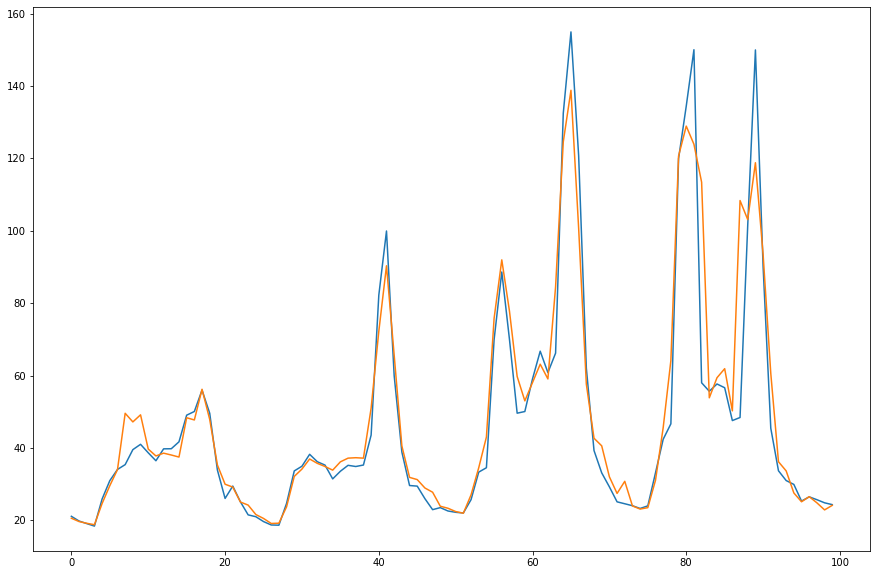

In [9]:
import matplotlib.pyplot as plt

# predictions for whole data
predictions = regr.predict(x)

start = 0
end = 100
y[start:end].plot(figsize=(15, 10))
plt.plot(np.arange(start, end), predictions[start:end])
plt.show()

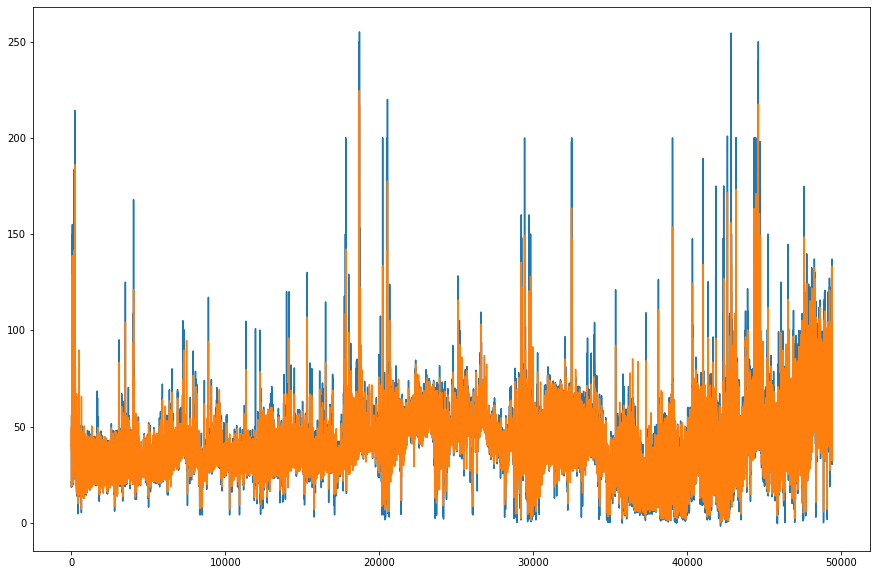

In [10]:
y.plot(figsize=(15, 10))
plt.plot(np.arange(len(y)), predictions)
plt.show()

### Save the model

In [11]:
import pickle

pickle.dump(regr, open('regression_model.sav', 'wb'))
print("Model saved!")

Model saved!
